# Web Book Bayesian Inference


# Chapter 7: Predictive Distributions

# Part 1

Do people prefer to use the word “data” as singular or plural?

$ \theta $ is the proportion of people who think "data" is a singular word




| $\theta$    | Prior Probability | Weighted $\theta$ = Prior Prob $\times \theta$ | Prior Prob $\times \theta^2$ |
| -------- | ------- | ------- | ------- |
| 0.1  | 0.01    | 0.001    | 0.0001    |
| 0.3 | 0.05     | 0.015     | 0.0045     |
| 0.5    | 0.15    | 0.045    | 0.0375    |
| 0.7    | 0.30    | 0.21    | 0.147    |
| 0.9    | 0.49    | 0.441    | 0.3969    |
|        |     | $E(\theta) = 0.742$    | $E(\theta^2) = 0.586$  |

$ \textbf{Prior Predictive Probability} = 0.742 $, 
and 
$ \sigma(\theta) = 0.281$

Not sure if the $\sigma$ above means much... we have our prior distribution above which has a lot more information.  We lose information in characterising the distribution with two values ($\mu, \sigma$) because we must then impose some distribution on the prior e.g. Normal.

Text(0.5, 0, 'Theta')

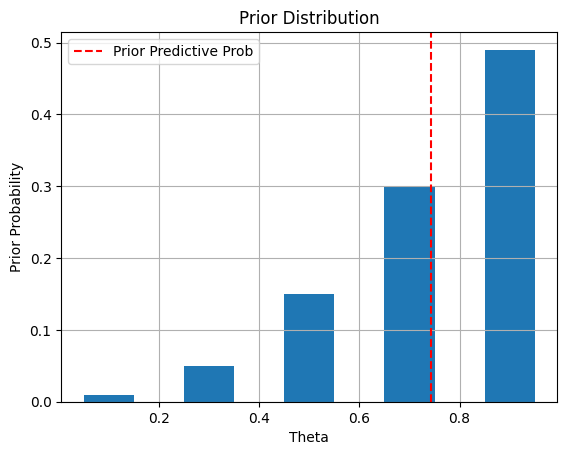

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

thetas = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
prior_probs = np.array([0.01, 0.05, 0.15, 0.30, 0.49])

weighted_avg = np.sum(thetas * prior_probs)

fig, ax = plt.subplots(1)
ax.grid(True)
ax.bar(thetas, prior_probs, width=0.1)
ax.axvline(weighted_avg, color='red', ls='--', label='Prior Predictive Prob')
ax.legend()
ax.set_title("Prior Distribution")
ax.set_ylabel("Prior Probability")
ax.set_xlabel("Theta")




35 students take part in a survey.  Simulate distributions for each of the prior values (0.1, 0.3, 0.5, 0.7, 0.9) that $Y$ students believe that "data" is a singular noun.

$Y_i \sim \text{binomial}(n=35, p=p_i)$ , where $i \in $ `range(len(priors))`

The Prior Predictive Probability that Y >= 34 students is 0.0600


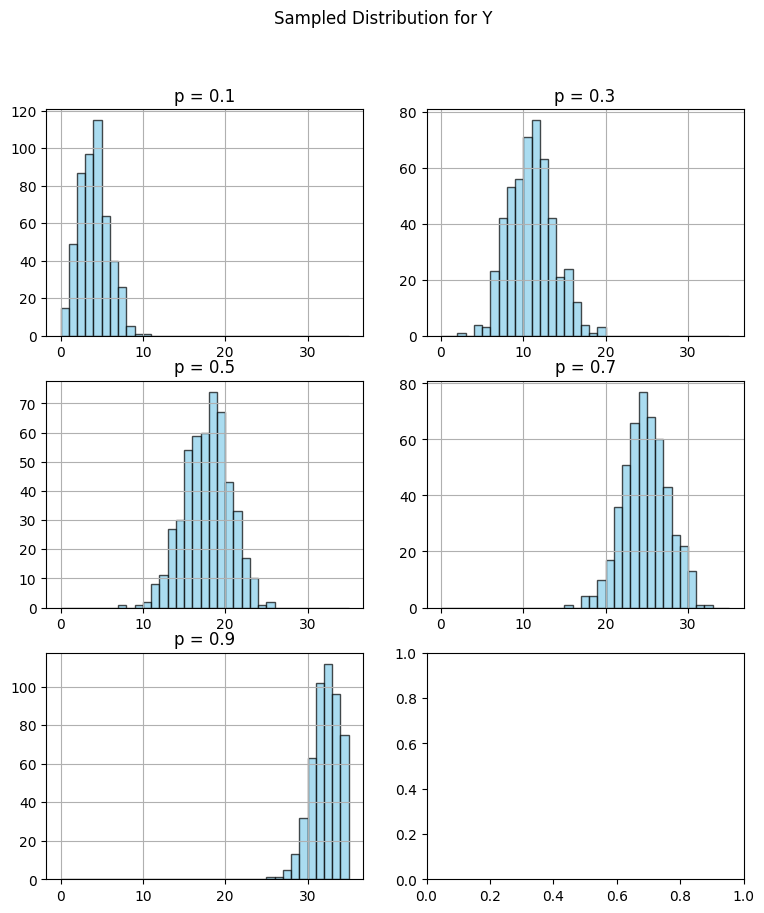

In [2]:
n = 35
sample_size = 500 

fig, axs = plt.subplots(3, 2, figsize=(9, 10))
plt.suptitle("Sampled Distribution for Y")
for i, ax in enumerate(axs.flatten()[0:5]):
    p = thetas[i]
    ax.grid(True)
    ax.set_title('p = {}'.format(p))
    samples = np.random.binomial(n, p, size=sample_size)
    ax.hist(samples, bins=range(n+1), color='skyblue', edgecolor='black', alpha=0.7)


# Prior Predictive Probability that at least 34 out of 35 students believe "data" is a singular noun
prior_predictive_prob = 0

for prior_prob, theta in zip(prior_probs, thetas):
    successful_sample = 1 - sp.stats.binom.cdf(33, n, theta)
    prior_predictive_prob += successful_sample * prior_prob

print("The Prior Predictive Probability that Y >= 34 students is {:.4f}".format(prior_predictive_prob))


## For the remaining parts, suppose that 31 students in a sample of 35 Cal Poly statistics students prefer data as singular.

`The problem here is normalising the likelihood!! We need to make is so that posterior sums to 1, by dividing by unconditional p(data)`

I have solved this by normalising the posteriors

The Posterior Predictive Probability that Y >= 34 students is 0.1199


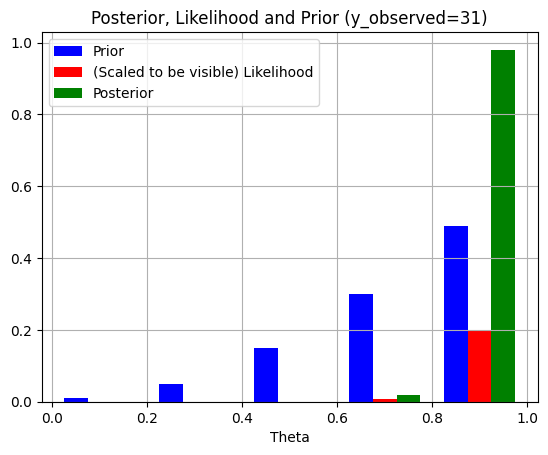

In [8]:
# Posterior = Likelihood * Prior 
y_observed = 31

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = sp.stats.binom.pmf(y_observed, n, theta) 

posteriors = likelihoods * prior_probs

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(posteriors)[-1] / len(posteriors)
posteriors = posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
width = 0.05
ax.bar(thetas - width, prior_probs, width, color='blue', label='Prior')
ax.bar(thetas, likelihoods, width, color='red', label='Likelihood')
ax.bar(thetas + width, posteriors, width, color='green', label='Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed=31)")
ax.set_xlabel("Theta")

# Posterior Predictive Probability that at least 34 out of 35 students think "data" is a singular noun

posterior_predictive_prob = 0

for posterior, theta in zip(posteriors, thetas):
    successful_sample = 1 - sp.stats.binom.cdf(33, n, theta)
    posterior_predictive_prob += successful_sample * posterior

print("The Posterior Predictive Probability that Y >= 34 students is {:.4f}".format(posterior_predictive_prob))




# Part 2

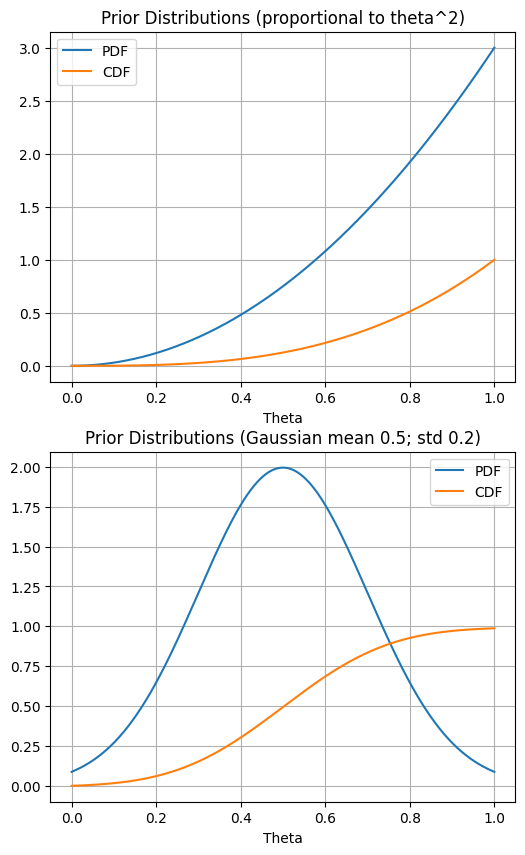

In [4]:
thetas = np.linspace(0, 1, 10001)

# Let my prior be a gaussian centered on 0.5 with standard deviation 0.2

mu = 0.5
sigma = 0.2

gauss_priors = sp.stats.norm.pdf(thetas, mu, sigma)


# Now assume the prior distribution is proportional to theta^2

priors = 3 * thetas**2 

fig, axs = plt.subplots(2, figsize=(6,10))
axs[0].set_xlabel('Theta')
axs[0].set_title('Prior Distributions (proportional to theta^2)')
axs[0].grid(True)
axs[0].plot(thetas, priors, label = 'PDF')
axs[0].plot(thetas, np.cumsum(priors) / len(priors), label = 'CDF')
axs[0].legend()
axs[1].set_xlabel('Theta')
axs[1].set_title('Prior Distributions (Gaussian mean 0.5; std 0.2)')
axs[1].grid(True)
axs[1].plot(thetas, gauss_priors, label = 'PDF')
axs[1].plot(thetas, np.cumsum(gauss_priors) / len(gauss_priors), label = 'CDF')
axs[1].legend()


# Prior Predictive Distribution

Say we have our prior $p(\theta)$. We want to work out a predictive distribution, weighted by the priors.

$$ p(Evidence | \theta) \sim \text{Binomial}(n=35, p=\theta) $$

$$ p(Evidence) = \Sigma_\theta \left\{p(Evidence | \theta) \times p(\theta)\right\}$$

`Is this correct? Let's write it down below...`

### Quadratic Prior

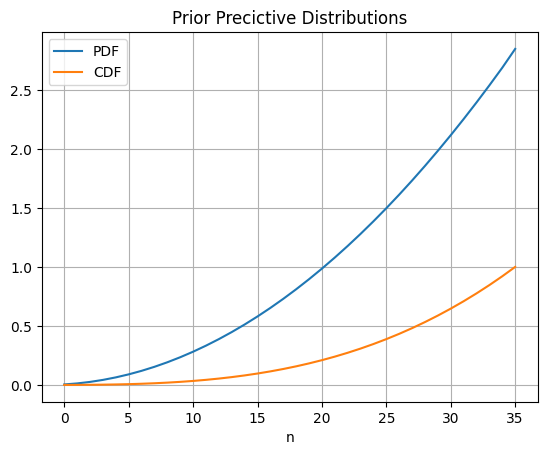

In [5]:
# Prior Predictive Distribution using the theta^2 distribution
n = 35
prior_predictive_dist = np.full(n+1, 0.0)

for prior, theta in zip(priors, thetas):
    theta_dist = sp.stats.binom.pmf(np.arange(0, n+1, 1), n, theta)
    prior_predictive_dist += theta_dist * prior

# Normalise prior_predictive_dist
prior_predictive_dist /= np.cumsum(prior_predictive_dist)[-1] / len(prior_predictive_dist)

fig, ax = plt.subplots(1)
ax.set_xlabel('n')
ax.set_title('Prior Precictive Distributions')
ax.grid(True)
ax.plot(np.arange(0, n+1, 1), prior_predictive_dist, label = 'PDF')
ax.plot(np.arange(0, n+1, 1), np.cumsum(prior_predictive_dist) / len(prior_predictive_dist), label = 'CDF')
ax.legend()

### Gaussian Prior

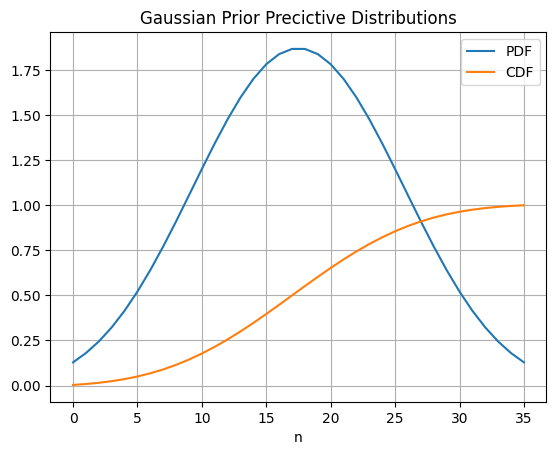

In [6]:
n = 35
gauss_prior_predictive_dist = np.full(n+1, 0.0)


for prior, theta in zip(gauss_priors, thetas):
    theta_dist = sp.stats.binom.pmf(np.arange(0, n+1, 1), n, theta)
    gauss_prior_predictive_dist += theta_dist * prior

# Normalise prior_predictive_dist
gauss_prior_predictive_dist /= np.cumsum(gauss_prior_predictive_dist)[-1] / len(gauss_prior_predictive_dist)

fig, ax = plt.subplots(1)
ax.set_xlabel('n')
ax.set_title('Gaussian Prior Precictive Distributions')
ax.grid(True)
ax.plot(np.arange(0, n+1, 1), gauss_prior_predictive_dist, label = 'PDF')
ax.plot(np.arange(0, n+1, 1), np.cumsum(gauss_prior_predictive_dist) / len(gauss_prior_predictive_dist), label = 'CDF')
ax.legend()

# Posterior Distribution

Find the posterior distribution over $\theta$ by calculating the likelihood (y_observed = 31 out of 25 trials) and multiplying into the prior.

### Quadratic Prior

In [7]:
# Choose what happened in the test out of 35 candidates

y_observed = 31

Text(0.5, 0, 'Theta')

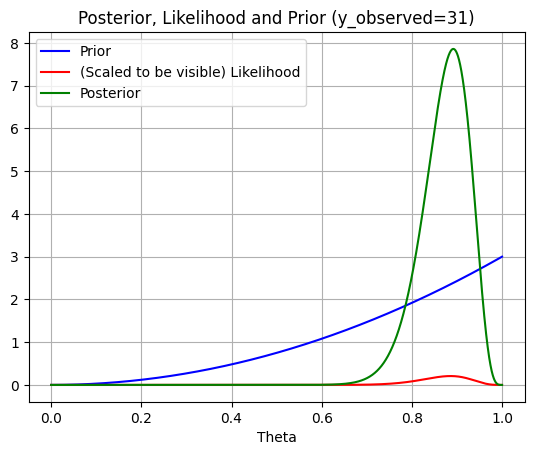

In [8]:
# Posterior = Likelihood * Prior 

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = sp.stats.binom.pmf(y_observed, n, theta) 

posteriors = likelihoods * priors

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(posteriors)[-1] / len(posteriors)
posteriors = posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, priors, color='blue', label='Prior')
ax.plot(thetas, likelihoods, color='red', label='(Scaled to be visible) Likelihood')
ax.plot(thetas, posteriors, color='green', label='Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed={})".format(y_observed))
ax.set_xlabel("Theta")



### Gaussian Prior

Text(0.5, 0, 'Theta')

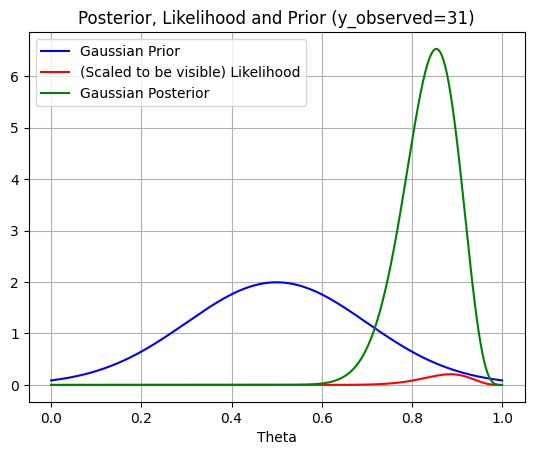

In [9]:
# Posterior = Likelihood * Prior 

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = sp.stats.binom.pmf(y_observed, n, theta) 

gauss_posteriors = likelihoods * gauss_priors

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(gauss_posteriors)[-1] / len(gauss_posteriors)
gauss_posteriors = gauss_posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, gauss_priors, color='blue', label='Gaussian Prior')
ax.plot(thetas, likelihoods, color='red', label='(Scaled to be visible) Likelihood')
ax.plot(thetas, gauss_posteriors, color='green', label='Gaussian Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed={})".format(y_observed))
ax.set_xlabel("Theta")



## Comparison of Priors

Text(0.5, 0, 'Theta')

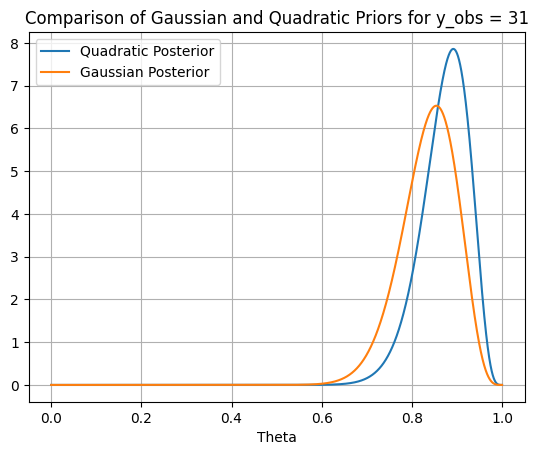

In [10]:
fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, posteriors, label='Quadratic Posterior')
ax.plot(thetas, gauss_posteriors, label='Gaussian Posterior')
ax.legend()
ax.set_title("Comparison of Gaussian and Quadratic Priors for y_obs = {}".format(y_observed))
ax.set_xlabel("Theta")


# Questions

1. What distribution follows from a given prior distribution? E.g. if prior is Gaussian --> posterior is Gaussian.  What about Uniform, Quadratic, Exponential, Beta, Gamma
2. How do we select our priors? 
3. Normalisation of Posterior --> always done by enforcing integral of PDF is 1? 